In [2]:
import numpy as np
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt

In [8]:
fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_all_20170101_20181231.nc')
dep_idx = 39

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [5]:
def make_ts_arr(jdepth, data):
    river_arr = data[:, 0:jdepth].sum(axis=3).sum(axis=2).sum(axis=1)
    return river_arr.to_numpy()

In [6]:
time = fw_rivers['time'].to_numpy()
Fraser_arr = make_ts_arr(dep_idx, fw_rivers.fraser_river)

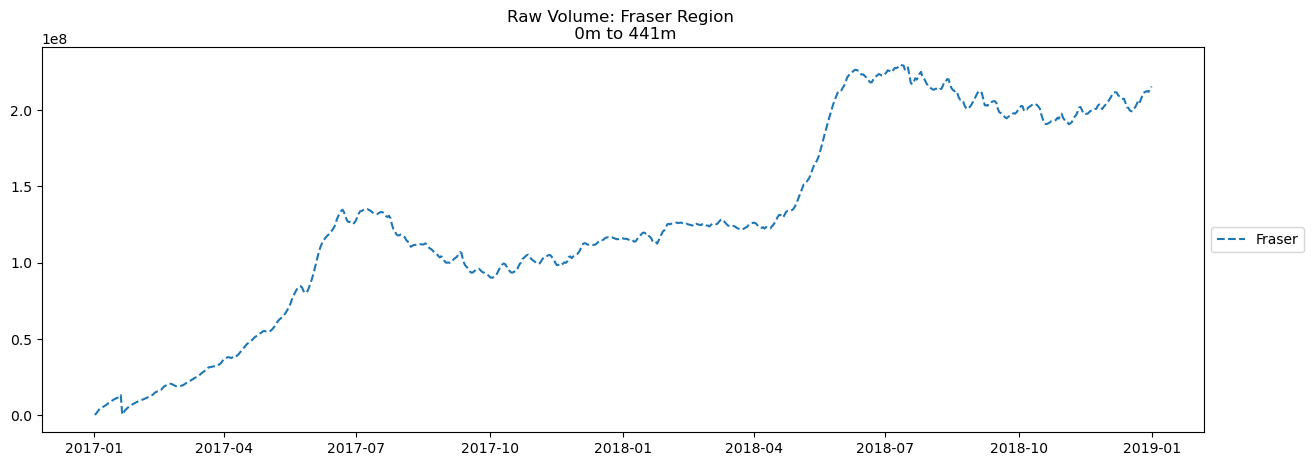

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(time, Fraser_arr, label='Fraser', linestyle='--')
ax.set_title('Raw Volume: {} Region \n 0m to {}m'.format('Fraser', int(float(fw_rivers['depth'][dep_idx].values))))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('timeseries_plots/Fraser_modelandobs_volume.png')